In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests,yaml,datetime,os,re
os.chdir(os.getcwd())
from bs4 import BeautifulSoup as bs
from tqdm import tqdm as tqdm
pd.set_option('display.max_rows', 10)
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
sns.set_style("darkgrid")

from dateutil.relativedelta import relativedelta

path = "C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage"

Soccer

In [2]:
soccer = pd.read_csv("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\All\\Matches.csv")
soccer1 = pd.read_csv(path+"\\Matches.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\All\\Matches.csv'

In [3]:
soccer1 = soccer1.drop(['BbAH','BbAHh','AHh','BbMxAHH','BbAvAHH','BbMxAHA',
                  'BbAvAHA','B365AHH','B365AHA','PAHH','PAHA','MaxAHH',
                  'MaxAHA','AvgAHH','AvgAHA','Referee','HS','AS','HST',
                  'AST','HC','AC','HF','AF','HFKC','AFKC'],axis=1)

In [4]:
def cleansoccer(df):
    df['homegoals'] = df['HG'].fillna(0)+df['FTHG'].fillna(0)
    df['awaygoals']=df['AG'].fillna(0)+df['FTAG'].fillna(0)
    
    soc = df[['League','Date','B365H','B365D','B365A','BSH','BSD','BSA','BWH','BWD','BWA','GBH','GBD','GBA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PH','PSD','PD','PSA','PA','SBH',
                     'SBD','SBA','SJH','SJD','SJA','VCH','VCD','VCA','WHH','WHD','WHA','Home','Away','MaxH','MaxD','MaxA','Max>2.5','Max<2.5','homegoals','awaygoals']]
    soc['Date']=soc['Date'].astype(str).apply(lambda x: x.replace('-','')[:8]).astype(int)
    soc1 = soc[['League','Date','Home','Away','homegoals','awaygoals']]
    lst = ['Bet365','Bwin','VCBet','William Hill','Unibet','Pinnacle','Marathonbet']

    home = ['B365H','BWH','GBH','LBH','PSH','PH','SBH','SJH','VCH','WHH','MaxH','League','Date','Home','Away']
    draw = ['B365D','BWD','GBD','LBD','PSD','PD','SBD','SJD','VCD','WHD','MaxD','League','Date','Home','Away']
    away = ['B365A','BWA','GBA','LBA','PSA','PA','SBA','SJA','VCA','WHA','MaxA','League','Date','Home','Away']
    
    hom = soc[home].rename(columns={'B365H':'Bet365','BWH':'Bwin','GBH':'Gamebookers',
                                    'LBH':'Ladbrokes','PSH':'Pinnacle','PH':'Pinnacle',
                                    'SBH':'Sportingbet','SJH':'Stan James','VCH':'VC Bet','WHH':'William Hill'})
    dra = soc[draw].rename(columns={'B365D':'Bet365','BWD':'Bwin','GBD':'Gamebookers',
                                    'LBD':'Ladbrokes','PSD':'Pinnacle','PD':'Pinnacle',
                                    'SBD':'Sportingbet','SJD':'Stan James','VCD':'VC Bet','WHD':'William Hill'})
    awa = soc[away].rename(columns={'B365A':'Bet365','BWA':'Bwin','GBA':'Gamebookers',
                                    'LBA':'Ladbrokes','PSA':'Pinnacle','PA':'Pinnacle',
                                    'SBA':'Sportingbet','SJA':'Stan James','VCA':'VC Bet','WHA':'William Hill'})
    
    hom['Max'] = hom[['Bet365','Bwin','Gamebookers','Ladbrokes','Pinnacle','Sportingbet','Stan James','VC Bet','William Hill']].max(axis=1)
    hom['MaxH']=hom['Max']
    dra['Max']=dra[['Bet365','Bwin','Gamebookers','Ladbrokes','Pinnacle','Sportingbet','Stan James','VC Bet','William Hill']].max(axis=1)
    dra['MaxD']=dra['Max']
    awa['Max']=awa[['Bet365','Bwin','Gamebookers','Ladbrokes','Pinnacle','Sportingbet','Stan James','VC Bet','William Hill']].max(axis=1)
    awa['MaxA']=awa['Max']
    hom = hom.fillna('')
    dra = dra.fillna('')
    awa = awa.fillna('')
    
    hom=hom[hom['MaxH']!='']
    dra=dra[dra['MaxD']!='']
    awa=awa[awa['MaxA']!='']
    
    alll = hom.merge(dra,on=['League','Date','Home','Away'])
    allll= alll.merge(awa,on=['League','Date','Home','Away'])
    
    final = allll.merge(soc1,on=['League','Date','Home','Away'])
    
    colh = list(final.columns)
    for _ in final.index:
        lsth = list(final.loc[_,:])
        tfh = final.loc[_,'MaxH']
        tfd = final.loc[_,'MaxD']
        tfa = final.loc[_,'MaxA']
        indh = lsth.index(tfh)
        indd = lsth.index(tfd)
        inda = lsth.index(tfa)
        final.loc[_,'maxbookiehome'] = colh[indh]
        final.loc[_,'maxbookiedraw'] = colh[indd]
        final.loc[_,'maxbookieaway'] = colh[inda]
        
    finalcols = ['League','Date','Home','Away','MaxH','MaxD','MaxA','homegoals','awaygoals','maxbookiehome','maxbookiedraw','maxbookieaway']
    soccer = final[finalcols]
        
    soccer['maxbookiehome'] = soccer['maxbookiehome'].apply(lambda x: x.replace('_x',''))
    soccer['maxbookiehome'] = soccer['maxbookiehome'].apply(lambda x: x.replace('_y',''))
    soccer['maxbookiedraw'] = soccer['maxbookiedraw'].apply(lambda x: x.replace('_x',''))
    soccer['maxbookiedraw'] = soccer['maxbookiedraw'].apply(lambda x: x.replace('_y',''))
    soccer['maxbookieaway'] = soccer['maxbookieaway'].apply(lambda x: x.replace('_x',''))
    soccer['maxbookieaway'] = soccer['maxbookieaway'].apply(lambda x: x.replace('_y',''))
    return soccer
    

In [5]:
soc = cleansoccer(soccer1)

In [6]:
soc.to_csv("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\cleaned\\soccer.csv")

MLB

In [7]:
mlb2019 = pd.read_csv(path+"\\mlb\\mlb_2019.csv",sep=';')
mlb2020 = pd.read_csv(path+"\\mlb\\mlb_2020.csv",sep=';')
mlb2021 = pd.read_csv(path+"\\mlb\\mlb_2021.csv",sep=';')
mlb2022 = pd.read_csv(path+"\\mlb\\mlb_2022.csv",sep=';')
mlb = pd.concat([mlb2019,mlb2020,mlb2021,mlb2022],axis=0)

In [8]:
# mlb2019['doddhome'] = mlb2019['OddHome'].apply(lambda x: (x+100)/100 if x>0 else ((-x+100)/-x))
# mlb2019['doddaway'] = mlb2019['OddAway'].apply(lambda x: (x+100)/100 if x>0 else ((-x+100)/-x))
# #mlb2019['hw_impprob'] = 1/mlb2019['doddhome']
# #mlb2019['aw_impprob'] = 1/mlb2019['doddaway']
# mlb2019['Date'] = mlb2019['Date'].apply(lambda x: datetime.datetime.strptime(x,'%d %b %Y').strftime('%Y%m%d'))
# mlb2019['hid'] = mlb2019['Home_id'].apply(lambda x: ''.join(i[0] for i in x.split()))
# mlb2019['aid'] = mlb2019['Away_id'].apply(lambda x: ''.join(i[0] for i in x.split()))
# mlb2019['unique_id'] = mlb2019['hid'].astype(str)+mlb2019['aid'].astype(str)+mlb2019['Date'].astype(str)+mlb2019['Score_home'].astype(str)+mlb2019['Score_away'].astype(str)

In [9]:
# ho = mlb2019.drop('doddaway',axis=1)
# ao = mlb2019.drop('doddhome',axis=1)
# dts = pd.pivot_table(mlb2019,values='Date',index='unique_id',aggfunc='last')

In [10]:
# ho = pd.pivot_table(ho,values='doddhome',index='unique_id',columns=['Bookmaker']).add_suffix('_home')
# ao = pd.pivot_table(ao,values='doddaway',index='unique_id',columns=['Bookmaker']).add_suffix('_away')

In [11]:
# maxih,colh = ho.max(axis=1),list(ho.columns)
# maxia,cola = ao.max(axis=1),list(ao.columns)
# for _ in ho.index:
#     lsth = list(ho.loc[_,:])
#     lsta = list(ao.loc[_,:])
#     tfh = maxih.loc[_,]
#     tfa = maxia.loc[_,]
#     indh = lsth.index(tfh)
#     inha = lsta.index(tfa)
#     ho.loc[_,'maxbookiehome'] = colh[indh]
#     ao.loc[_,'maxbookieaway'] = cola[inha]

In [12]:
# ho['maxhome'] = ho.max(axis=1)
# ao['maxaway'] = ao.max(axis=1)

In [13]:
# #implied probability 
# ao['away_prob'] = 1/ao['maxaway']
# ho['home_prob'] = 1/ho['maxhome']

In [14]:
# al = pd.concat([ao,ho,dts],axis=1)[['maxbookiehome','maxbookieaway','maxhome','maxaway','home_prob','away_prob','Date']]

In [15]:
# al = al.sort_values('Date')

In [16]:
# z = al['home_prob']+al['away_prob']

NBA

In [8]:
nba2019 = pd.read_csv(path+"\\nba\\nba_2019-2020.csv",sep=';')
nba2020 = pd.read_csv(path+"\\nba\\nba_2020-2021.csv",sep=';')
nba2021 = pd.read_csv(path+"\\nba\\nba_2021-2022.csv",sep=';')
nba2022 = pd.read_csv(path+"\\nba\\nba_CurrentSeason.csv",sep=';')
nba = pd.concat([nba2019,nba2020,nba2021,nba2022],axis=0)

NFL

In [9]:
nfl2019 = pd.read_csv(path+"\\nfl\\nfl_2019-2020.csv",sep=';')
nfl2020 = pd.read_csv(path+"\\nfl\\nfl_2020-2021.csv",sep=';')
nfl2021 = pd.read_csv(path+"\\nfl\\nfl_2021-2022.csv",sep=';')
nfl2022 = pd.read_csv(path+"\\nfl\\nfl_CurrentSeason.csv",sep=';')
nfl = pd.concat([nfl2019,nfl2020,nfl2021,nfl2022],axis=0)

NHL

In [10]:
nhl2019 = pd.read_csv(path+"\\nhl\\nhl_2019-2020.csv",sep=';')
nhl2020 = pd.read_csv(path+"\\nhl\\nhl_2020-2021.csv",sep=';')
nhl2021 = pd.read_csv(path+"\\nhl\\nhl_2021-2022.csv",sep=';')
nhl2022 = pd.read_csv(path+"\\nhl\\nhl_CurrentSeason.csv",sep=';')
nhl = pd.concat([nhl2019,nhl2020,nhl2021,nhl2022],axis=0)

All Sports

In [11]:
def returnall(dfs):
    final = []
    
    for df in dfs:
        
        df['doddhome'] = df['OddHome'].apply(lambda x: (x+100)/100 if x>0 else ((-x+100)/-x))
        df['doddaway'] = df['OddAway'].apply(lambda x: (x+100)/100 if x>0 else ((-x+100)/-x))
        df['Dates'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x,'%d %b %Y').strftime('%Y%m%d'))
        df['hid']=df['Home_id'].apply(lambda x: ''.join(i[0] for i in x.split()))
        df['aid']=df['Away_id'].apply(lambda x: ''.join(i[0] for i in x.split()))
        df['unique_id'] = df['hid'].astype(str)+df['aid'].astype(str)+df['Dates'].astype(str)+df['Score_home'].astype(str)+df['Score_away'].astype(str)
        
        dts = pd.pivot_table(df,values='Dates',index='unique_id',aggfunc='last')
        hometeam = pd.pivot_table(df,values='Home_id',index='unique_id',aggfunc='last')
        awayteam = pd.pivot_table(df,values='Away_id',index='unique_id',aggfunc='last')
        homescore = pd.pivot_table(df,values='Score_home',index='unique_id',aggfunc='last')
        awayscore = pd.pivot_table(df,values='Score_away',index='unique_id',aggfunc='last')
        
        
        
        ho = df.drop('doddaway',axis=1)
        ao = df.drop('doddhome',axis=1)
        
        ho = pd.pivot_table(ho,values='doddhome',index='unique_id',columns=['Bookmaker'])
        ao = pd.pivot_table(ao,values='doddaway',index='unique_id',columns=['Bookmaker'])
        
        maxih,colh = ho.max(axis=1),list(ho.columns)
        maxia,cola = ao.max(axis=1),list(ao.columns)
        for _ in ho.index:
            lsth = list(ho.loc[_,:])
            lsta = list(ao.loc[_,:])
            tfh = maxih.loc[_,]
            tfa = maxia.loc[_,]
            indh = lsth.index(tfh)
            inha = lsta.index(tfa)
            ho.loc[_,'maxbookiehome'] = colh[indh]
            ao.loc[_,'maxbookieaway'] = cola[inha]
            
        ho['MaxH'] = ho.max(axis=1)
        ao['MaxA'] = ao.max(axis=1)
        
        ao['away_prob'] = 1/ao['MaxA']
        ho['home_prob'] = 1/ho['MaxH']
        
        alls = pd.concat([ao,ho,dts,hometeam,awayteam,homescore,awayscore],axis=1)[['maxbookiehome','maxbookieaway','MaxH','MaxA','home_prob',\
                                                                                    'away_prob','Dates','Home_id','Away_id','Score_home','Score_away']]
        alls = alls.sort_values('Dates')
        alls['totalodds'] = alls['away_prob']+alls['home_prob']
        
        lst = ['Bet365','Bwin','VC Bet','William Hill','Unibet','Pinnacle','Marathonbet']
        alls_final = alls[(alls['maxbookiehome'].isin(lst))&(alls['maxbookieaway'].isin(lst))]
        
        final.append(alls_final)
    return final

In [12]:
dataframes = [mlb,nhl,nfl,nba]

In [13]:
cleaneddata = returnall(dataframes)

C:\Users\awkno\AppData\Local\Temp\ipykernel_28884\3244102158.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ho['MaxH'] = ho.max(axis=1)
C:\Users\awkno\AppData\Local\Temp\ipykernel_28884\3244102158.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ao['MaxA'] = ao.max(axis=1)
C:\Users\awkno\AppData\Local\Temp\ipykernel_28884\3244102158.py:39: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ho['MaxH'] = ho.max(axis=1)
C:\Users\awkno\AppData\Local\Temp\ipykernel_28884\3244102158.py:

In [14]:
mlb = cleaneddata[0]
nhl = cleaneddata[1]
nfl = cleaneddata[2]
nba = cleaneddata[3]

In [15]:
mlb

,maxbookiehome,maxbookieaway,MaxH,MaxA,home_prob,away_prob,Dates,Home_id,Away_id,Score_home,Score_away,totalodds
unique_id,,,,,,,,,,,,
TBRPP2019022223,William Hill,Pinnacle,1.840336,2.120000,0.543379,0.471698,20190222,Tampa Bay Rays,Philadelphia Phillies,2,3,1.015077
BRSNYY2019022385,William Hill,Pinnacle,1.847458,2.170000,0.541284,0.460829,20190223,Boston Red Sox,New York Yankees,8,5,1.002114
TBJDT2019022304,Pinnacle,Pinnacle,1.740741,2.160000,0.574468,0.462963,20190223,Toronto Blue Jays,Detroit Tigers,0,4,1.037431
CCMB2019022384,Unibet,Pinnacle,1.800000,2.100000,0.555556,0.476190,20190223,Chicago Cubs,Milwaukee Brewers,8,4,1.031746
WNHA2019022376,Unibet,Pinnacle,1.833333,2.140000,0.545455,0.467290,20190223,Washington Nationals,Houston Astros,7,6,1.012744
...,...,...,...,...,...,...,...,...,...,...,...,...
PPSDP2022102242,Pinnacle,Unibet,2.120000,1.892857,0.471698,0.528302,20221022,Philadelphia Phillies,San Diego Padres,4,2,1.000000
HAPP2022102956,Marathonbet,Marathonbet,1.657895,2.500000,0.603175,0.400000,20221029,Houston Astros,Philadelphia Phillies,5,6,1.003175
PPHA2022110270,Pinnacle,Marathonbet,2.140000,1.877193,0.467290,0.532710,20221102,Philadelphia Phillies,Houston Astros,7,0,1.000000


In [16]:
mlb['League'] = 'mlb'
nhl['League'] = 'nhl'
nfl['League'] = 'nfl'
nba['League'] = 'nba'

In [17]:
nba[nba['totalodds']<.99].shape

(58, 13)

In [18]:
nfl[nfl['totalodds']<.99].shape

(13, 13)

In [19]:
nhl[nhl['totalodds']<.99].shape

(37, 13)

In [20]:
mlb[mlb['totalodds']<.99].shape

(45, 13)

In [21]:
mlb['month']=mlb['Dates'].astype(str).apply(lambda x: int(x[4:6]))

In [22]:
mlb=mlb[mlb['month']>=4]

In [23]:
mlb.to_csv(path+"\\cleaned\\mlb.csv")
nhl.to_csv(path+"\\cleaned\\nhl.csv")
nfl.to_csv(path+"\\cleaned\\nfl.csv")
nba.to_csv(path+"\\cleaned\\nba.csv")

In [24]:
cl_path= "C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\cleaned"

In [25]:
soccer = pd.read_csv(cl_path+"\\soccer.csv",index_col=0)
mlb = pd.read_csv(cl_path+"\\mlb.csv").rename(columns={'Dates':'Date','Home_id':'Home','Away_id':'Away','Score_home':'homescore','Score_away':'awayscore'}).drop('unique_id',axis=1)
nba = pd.read_csv(cl_path+"\\nba.csv").rename(columns={'Dates':'Date','Home_id':'Home','Away_id':'Away','Score_home':'homescore','Score_away':'awayscore'}).drop('unique_id',axis=1)
nhl = pd.read_csv(cl_path+"\\nhl.csv").rename(columns={'Dates':'Date','Home_id':'Home','Away_id':'Away','Score_home':'homescore','Score_away':'awayscore'}).drop('unique_id',axis=1)
nfl = pd.read_csv(cl_path+"\\nfl.csv").rename(columns={'Dates':'Date','Home_id':'Home','Away_id':'Away','Score_home':'homescore','Score_away':'awayscore'}).drop('unique_id',axis=1)

In [26]:
# def func(x,y):
#     return x.replace(y,'')
# mlb[['unique_id','Dates']].apply(lambda x: re.split("(\d+)",func(x.unique_id,str(x.Dates))),axis=1)

In [27]:
soccer['home_prob'] = 1/soccer['MaxH']
soccer['draw_prob'] = 1/soccer['MaxD']
soccer['away_prob'] = 1/soccer['MaxA']
soccer['totalodds'] = soccer['home_prob'] +soccer['draw_prob']+soccer['away_prob'] 
soccer = soccer.rename(columns={'homegoals':'homescore','awaygoals':'awayscore'})

In [28]:
final = pd.concat([soccer,mlb,nba,nhl,nfl],axis=0)

In [29]:
final = final.sort_values('Date').reset_index().drop(['index','month'],axis=1)
final[['home_prob','draw_prob','away_prob']] = final[['home_prob','draw_prob','away_prob']].round(8).fillna(0)

In [30]:
# final.loc[112617,'MaxD'] = (3300+100)/100
# final.loc[112617,'maxbookiedraw'] = 'Bet365'
# final.loc[112617,'draw_prob'] = 1/((3300+100)/100)
# final.loc[112617,'totalodds'] = final.loc[112617,'home_prob']+final.loc[112617,'draw_prob']+final.loc[112617,'away_prob'] 
# final.loc[117148,'MaxD'] = (5900+100)/100
# final.loc[117148,'maxbookiedraw'] = 'Bet365'
# final.loc[117148,'draw_prob'] = 1/((5900+100)/100)
# final.loc[117148,'totalodds'] = final.loc[117148,'home_prob']+final.loc[117148,'draw_prob']+final.loc[117148,'away_prob'] 

In [31]:
years = 3
cur_year = datetime.datetime.now().year
final['year']=final['Date'].apply(lambda x: int(str(x)[:4]))
final = final[final['year']>=cur_year-years].drop('year',axis=1)

In [32]:
final.to_csv(cl_path+"\\final.csv")

# Backtest

In [33]:
pd.options.display.max_rows = 10
final['maxbookieaway'].value_counts()

Pinnacle        32555
Bet365           5714
Bwin             3001
VC Bet           2954
William Hill     1445
Marathonbet      1157
Unibet            380
Name: maxbookieaway, dtype: int64

In [34]:
#assume we start with 50million
profit=1000000

In [111]:
final['MaxD'] = final['MaxD'].fillna(0)
final['signal'] = final['totalodds'].apply(lambda x: 1 if x<.99 else 0)
final['bethome']=0
final['betdraw']=0
final['betaway']=0
final['totalbet']=0
final['winhome']=0
final['windraw']=0
final['winaway']=0
final['totalwin']=0
final['winner'] = final[['homescore','awayscore']].apply(lambda x: 'D' if x.homescore==x.awayscore else('H' if x.homescore>x.awayscore else('A' if x.homescore<x.awayscore else 0)),axis=1)

In [36]:
final[final['signal']==1]['maxbookieaway'].value_counts()

Pinnacle        82
William Hill    71
Marathonbet     54
Bet365          39
Unibet          26
VC Bet          21
Bwin            14
Name: maxbookieaway, dtype: int64

In [87]:
def build_strategy(bet_amount, data,probability=.98,move = True):
    tobeton = data[data['signal']==1]

    bettingfunds=[bet_amount]
    profittotal=[0]
    bh,bd,ba,wh,wd,wa = [],[],[],[],[],[]
    dates = list(np.unique(data['Date']))
    rs = []
    for _ in tqdm(dates,desc = 'Progress Bar'):

        df = tobeton[tobeton['Date']==_]

        if df.shape[0]>0:
            
            i,ind = min(list(df.index)),df.index
            
            if move == True:
                df.loc[ind,'home_prob'] = df.loc[ind,'home_prob'].values+((1-probability)*.75/3)
                df.loc[ind,'draw_prob'] = df.loc[ind,'draw_prob'].values+((1-probability)*.75/3)
                df.loc[ind,'away_prob'] = df.loc[ind,'away_prob'].values+((1-probability)*.75/3)

                df.loc[ind,'MaxH'] = 1/df.loc[ind,'home_prob'].values
                df.loc[ind,'MaxD'] = 1/df.loc[ind,'draw_prob'].values
                df.loc[ind,'MaxA'] = 1/df.loc[ind,'away_prob'].values
            else:
                continue
            
            r,c = df.shape
            rs.append(r)
            if r==0:
                pass
            elif r==1:
                
                totalbet = bettingfunds[-1]
                remainder = bettingfunds[-1]-totalbet

                df.loc[i,'bethome'] = round(totalbet*df['home_prob'].item(),2)
                df.loc[i,'betdraw'] = round(totalbet*df['draw_prob'].item(),2)
                df.loc[i,'betaway'] = round(totalbet*df['away_prob'].item(),2)

                bh.append(df.loc[i,'bethome'].item())
                bd.append(df.loc[i,'betdraw'].item())
                ba.append(df.loc[i,'betaway'].item())

                tb = df.loc[i,'bethome'].item()+df.loc[i,'betdraw'].item()+df.loc[i,'betaway'].item()
                tobeton.loc[i,'totalbet'] = tb

                tobeton.loc[i,'winhome'] = round(df.apply(lambda x:x.bethome*x.MaxH if x.homescore>x.awayscore else 0,axis=1).item(),2)
                tobeton.loc[i,'windraw'] = round(df.apply(lambda x:x.betdraw*x.MaxD if x.homescore==x.awayscore else 0,axis=1).item(),2)
                tobeton.loc[i,'winaway'] = round(df.apply(lambda x:x.betaway*x.MaxA if x.homescore<x.awayscore else 0,axis=1).item(),2)

                profit = tobeton.loc[i,'winhome']+tobeton.loc[i,'winaway']+tobeton.loc[i,'windraw']-tb
                tobeton.loc[i,'totalwin']= profit

                if profit<0:
                    moneytobet = bettingfunds[-1]+tobeton.loc[i,'totalwin']
                else:
                    moneytobet = bet_amount#+profittotal[-1]*.5

                profittotal.append(profit+profittotal[-1])
                bettingfunds.append(round(moneytobet,2))

            else:
                
                totalbet = pd.DataFrame([bettingfunds[-1]/r for _ in range(r)])#*df['totalodds']).round(decimals=2)

                remainder = bettingfunds[-1]-totalbet.sum().item()

                df.loc[ind,'bethome'] = round((bettingfunds[-1]/r)*df['home_prob'],2).values#.item()
                df.loc[ind,'betdraw'] = round((bettingfunds[-1]/r)*df['draw_prob'],2).values#.item()
                df.loc[ind,'betaway'] = round((bettingfunds[-1]/r)*df['away_prob'],2).values#.item()

                bh.extend(list(df.loc[ind,'bethome']))
                bd.extend(list(df.loc[ind,'betdraw']))
                ba.extend(list(df.loc[ind,'betaway']))

                tb = sum(list(df.loc[ind,'bethome'])+list(df.loc[ind,'betdraw'])+list(df.loc[ind,'betaway']))
                tobeton.loc[ind,'totalbet'] = df.loc[ind,'bethome']+df.loc[ind,'betdraw']+df.loc[ind,'betaway']

                tobeton.loc[ind,'winhome'] = round(df.apply(lambda x:x.bethome*x.MaxH if x.homescore>x.awayscore else 0,axis=1),2)#.item()
                tobeton.loc[ind,'windraw'] = round(df.apply(lambda x:x.betdraw*x.MaxD if x.homescore==x.awayscore else 0,axis=1),2)#.item()
                tobeton.loc[ind,'winaway'] = round(df.apply(lambda x:x.betaway*x.MaxA if x.homescore<x.awayscore else 0,axis=1),2)#.item()

                tobeton.loc[ind,'totalwin'] = tobeton.loc[ind,'winhome']+tobeton.loc[ind,'windraw']+tobeton.loc[ind,'winaway']-tobeton.loc[ind,'totalbet']

                if sum(list(tobeton.loc[ind,'totalwin']))<0:
                    moneytobet = bettingfunds[-1]+sum(list(tobeton.loc[ind,'totalwin']))
                else:
                    moneytobet = bet_amount#+profittotal[-1]*.5

                zed = [moneytobet for _ in range(r)]
                profit = [sum(list(tobeton.loc[ind,'totalwin']))+profittotal[-1] for _ in range(r)]

                profittotal.extend(profit)
                bettingfunds.extend(zed)
        else:
            pass

    tobeton['profit']=profittotal[1:]
    tobeton['bethome'] = bh
    tobeton['betdraw'] = bd
    tobeton['betaway'] = ba
                                        
    final = data.drop(['bethome','betdraw','betaway','winhome','windraw','winaway','totalbet','totalwin'],
               axis=1).merge(tobeton,on=['League','Date','Home','Away','MaxH','MaxD','MaxA','homescore','awayscore',
                                        'maxbookiehome','maxbookiedraw','maxbookieaway','home_prob','draw_prob',
                                         'away_prob','totalodds','signal','winner'],how='outer')
    final[['bethome','betdraw','betaway','totalbet','winhome','windraw','winaway','totalwin']] = final[['bethome','betdraw','betaway','totalbet','winhome','windraw','winaway','totalwin']].fillna(0)
    final['profit'] = final['profit'].ffill().fillna(0)
    final['Date'] = final['Date'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y%m%d'))

    return final

In [112]:
returns = build_strategy(100000,final)

Progress Bar: 100%|██████████████████████████████████████████████████████████████| 1326/1326 [00:01<00:00, 1225.74it/s]


In [48]:
pd.options.display.max_columns=50

In [89]:
def stats(data, annualized=1,confidence_interval=.05):
    x = data.describe()
    frame = pd.DataFrame(index = [data.columns])
    
    frame['mean'] = x.loc['mean'].values * annualized
    frame['vol'] = x.loc['std'].values * np.sqrt(annualized)
    frame['median'] = x.loc['50%'].values
    frame['sharpe'] = frame['mean'].values/frame['vol'].values
    frame['VaR'] = data.quantile(confidence_interval).values
    frame['Skewness'] = data.skew().values
    frame['Kurtosis'] = data.kurtosis().values
    cum_ret = (1 + data).cumprod()
    rolling_max = cum_ret.cummax()
    drawdown = (cum_ret - rolling_max) / rolling_max
    
    maxdraw = drawdown.min()
    enddate = drawdown.idxmin()
    
    for col in drawdown:
        frame.loc[col,'Peak'] = (rolling_max.loc[:enddate[col],col]).idxmax()
        recovery = (drawdown.loc[enddate[col]:,col])

        try:
            frame.loc[col,'Recover'] = recovery[recovery >= 0].index[0]
        except:
            frame.loc[col,'Recover'] = None
        
        frame['Peak'] = pd.to_datetime(frame['Peak'])
        try:
            frame['Duration to Recover'] = (frame['Recover'] - frame['Peak'])
        except:
            None
    
    return frame

In [114]:
backtest = returns[['Date','profit']].groupby('Date').last()
backtest['profit'] = backtest['profit']+100000
backtest['BSC'] = backtest['profit'].pct_change()
backtest['Cumulative % Return'] = (backtest['BSC'] + 1).cumprod() -1

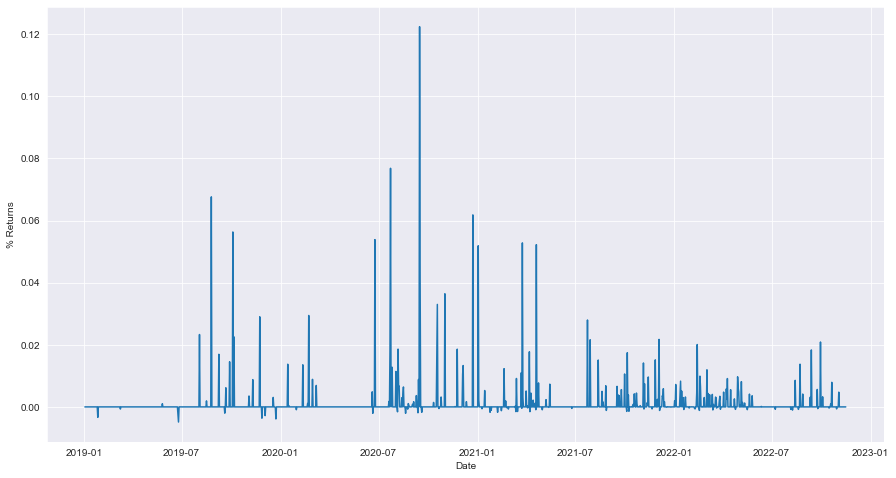

In [254]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(backtest.index,backtest['BSC'])
plt.xlabel('Date')
plt.ylabel('% Returns')
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\returns_percentage.jpg",dpi=300)

In [119]:
final[(final['signal']==1)]['League'].value_counts()

nba    58
SP2    48
nhl    37
mlb    31
I2     28
       ..
SC0     2
G1      2
D1      2
SP1     1
E2      1
Name: League, Length: 25, dtype: int64

In [120]:
final['month'] = final['Date'].apply(lambda x: str(x)[4:6])

In [121]:
pd.DataFrame(final[final['signal']==1]['month'].value_counts()).reset_index

<bound method DataFrame.reset_index of     month
03     39
10     38
04     36
08     33
02     28
..    ...
01     22
11     22
12     22
07     13
06      7

[12 rows x 1 columns]>

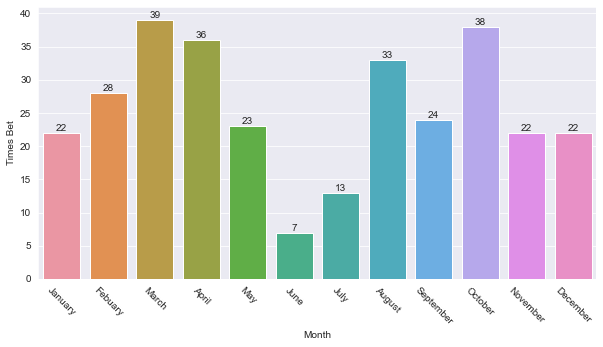

In [253]:
fig, ax = plt.subplots(figsize=(10,5))
df = final[final['signal']==1]
df = df['month'].value_counts().sort_index().reset_index()
df['index'] = df['index'].replace({'01':'January','02':'Febuary','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'})
ax = sns.barplot(x = 'index',y = 'month',data=df)
plt.xticks(rotation=-45)
ax.set(xlabel='Month',ylabel='Times Bet')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\months.jpg",dpi=300)

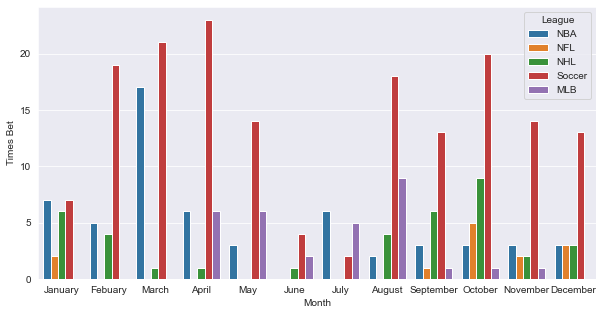

In [269]:
fig, ax = plt.subplots(figsize=(10,5))
df = final[final['signal']==1]
df['League'] = df['League'].replace(['B1','D1','D2','E0','E2','E3','EC','F1','F2','G1','I1','I2','N1','P1','SC0','SC1','SC2','SC3','SP1','SP2','T1'],'Soccer')
df['League'] = df['League'].replace({'nfl':'NFL','mlb':'MLB','nba':'NBA','nhl':'NHL'})
df = df[['month','League']].value_counts().sort_index().reset_index()
df['month'] = df['month'].replace({'01':'January','02':'Febuary','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'})
df = df.rename(columns={0:'vals'})
ax = sns.barplot(x= 'month',y = 'vals',hue='League',data=df)
ax.set(xlabel='Month',ylabel='Times Bet')
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\months_league.jpg",dpi=300)

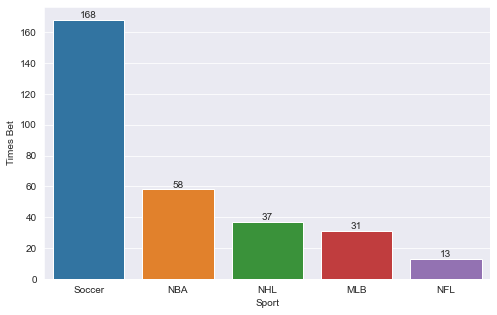

In [255]:
fig, ax = plt.subplots(figsize=(8,5))
df = final[final['signal']==1]
df['League'] = df['League'].replace(['B1','D1','D2','E0','E2','E3','EC','F1','F2','G1','I1','I2','N1','P1','SC0','SC1','SC2','SC3','SP1','SP2','T1'],'Soccer')
df['League'] = df['League'].replace({'nfl':'NFL','mlb':'MLB','nba':'NBA','nhl':'NHL'})
df = df['League'].value_counts()
df = df.reset_index()
ax = sns.barplot(x = 'index',y = 'League',data=df)
ax.set(xlabel='Sport',ylabel='Times Bet')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\leagues.jpg",dpi=300)

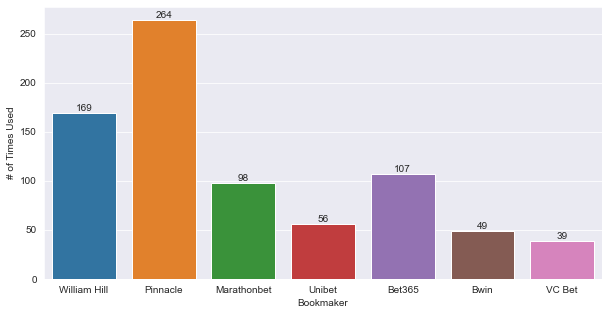

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
df = final[final['signal']==1]['maxbookiehome'].value_counts().reset_index()
df1 = final[final['signal']==1]['maxbookiedraw'].value_counts().reset_index()
df2 = final[final['signal']==1]['maxbookieaway'].value_counts().reset_index()
dfs = [df,df1,df2]
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='index',how='outer'), dfs).fillna(0)
# sns.barplot(x = df.index,y = df.values)
df_final['Bookmaker'] = df_final['maxbookiehome']+df_final['maxbookiedraw']+df_final['maxbookieaway']
df_final = df_final.drop(['maxbookiehome','maxbookiedraw','maxbookieaway'],axis=1)
df_final = df_final
ax = sns.barplot(x = 'index',y = 'Bookmaker',data=df_final)
ax.set(xlabel='Bookmaker', ylabel='# of Times Used')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\betsbybookie.jpg",dpi=300)

--find locations of where we are legally allowed to bet for each sportsbook. 

--how to scale it, whats the limit in terms of bets on each site. 

--run it 24 hours. 

--max bet amounts 

--liquidity how to get funds to the correct exchanges/ and how to get the money out 

--check if lines are different in different places

-- Issues, we need ties for all the football games. 

In [125]:
mbh = list(np.unique(returns['maxbookiehome']))
mba = list(np.unique(returns['maxbookieaway']))
mbd = list(np.unique(returns['maxbookiedraw'].astype(str)))

Bet365
- legal in NJ/Colorado in the US and the several countries in the EU as well as the UK
- max payout is 2million
- maximum deposit is 100,000 

Bwin
- maximum payout is 7000

VCBet
- available in UK

William Hill
- maximum payout is 2 million
- operated by caesars, operational in NJ and IL as well as other states and the UK

Unibet
- maximum payout is 1million

Pinnacle
- available in the uk
- max payout is 250000

Marathonbet
- maximum payout is 225000
- available in the uk not us. 

gamebookers
- transaction limited to 10g 
- available in the uk

ladbrokes
- available in the united kingdom
- 1 million maximum payout

sportingbets
- maximum weekly win of 250000
- available in the uk

stan james
- 200k maximuim payouts
- available in the us

In [126]:
#sb = list(set(mbh+mba+mbd))
#['Bet365','Bwin','VCBet','William Hill','Unibet','Pinnacle','Marathonbet',Gamebookers,Ladbrokes,Sportingbets,Stan James]

#### Comparison vs. Benchmark

In [127]:
aqr = pd.read_csv("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\Benchmark.csv")
spy = pd.read_csv("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\SPY.csv")
rf = pd.read_csv("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\rf.csv").rename(columns={'DGS10':'RF Values'})
#rf['RF Values'] = rf['RF Values'].apply(lambda x: float(x))

In [128]:
aqr.index = pd.to_datetime(aqr.Date)
aqr = aqr.loc['2019-01-02':'2022-11-16',:]
aqr['AQR'] = aqr['Adj Close'].pct_change().fillna(0)
spy.index = pd.to_datetime(spy.Date)
spy = spy.loc['2019-01-02':'2022-11-16',:]
spy['SPY'] = spy['Adj Close'].pct_change().fillna(0)
spy['SPY Cumulative'] = (spy['SPY']+1).cumprod().fillna(0)
rf.index = pd.to_datetime(rf.DATE)
rf = rf.loc['2019-01-02':'2022-11-16',:]
rf['RF'] = rf['RF Values'].pct_change()

In [129]:
def stats(data, annualized=1,confidence_interval=.05):
    x = data.describe()
    frame = pd.DataFrame(index = [data.columns])
    
    frame['mean'] = x.loc['mean'].values * annualized
    frame['vol'] = x.loc['std'].values * np.sqrt(annualized)
    frame['median'] = x.loc['50%'].values
    frame['sharpe'] = frame['mean'].values/frame['vol'].values
    frame['VaR'] = data.quantile(confidence_interval).values
    frame['Skewness'] = data.skew().values
    frame['Kurtosis'] = data.kurtosis().values
    cum_ret = (1 + data).cumprod()
    rolling_max = cum_ret.cummax()
    drawdown = (cum_ret - rolling_max) / rolling_max
    
    maxdraw = drawdown.min()
    enddate = drawdown.idxmin()
    
    for col in drawdown:
        frame.loc[col,'Peak'] = (rolling_max.loc[:enddate[col],col]).idxmax()
        recovery = (drawdown.loc[enddate[col]:,col])

        try:
            frame.loc[col,'Recover'] = recovery[recovery >= 0].index[0]
        except:
            frame.loc[col,'Recover'] = None
        
        frame['Peak'] = pd.to_datetime(frame['Peak'])
        try:
            frame['Duration to Recover'] = (frame['Recover'] - frame['Peak'])
        except:
            None
    
    return frame

In [130]:
comps = pd.concat([aqr['AQR'],backtest['BSC'],spy['SPY']],axis=1).fillna(0)

In [131]:
stats(comps,252)

,mean,vol,median,sharpe,VaR,Skewness,Kurtosis,Peak,Recover,Duration to Recover
AQR,0.058007,0.052837,0.0,1.097845,-0.003219,-4.249493,65.071751,2020-02-21,2020-07-06,136 days
BSC,0.293801,0.103033,0.0,2.851521,0.000000,9.903965,130.206201,2019-01-01,2019-08-03,214 days
SPY,0.111813,0.189350,0.0,0.590510,-0.017627,-0.629440,16.555832,2020-02-19,2020-08-10,173 days


In [132]:
stats(comps,365)

,mean,vol,median,sharpe,VaR,Skewness,Kurtosis,Peak,Recover,Duration to Recover
AQR,0.084018,0.063589,0.0,1.321257,-0.003219,-4.249493,65.071751,2020-02-21,2020-07-06,136 days
BSC,0.425544,0.124000,0.0,3.431807,0.000000,9.903965,130.206201,2019-01-01,2019-08-03,214 days
SPY,0.161952,0.227883,0.0,0.710679,-0.017627,-0.629440,16.555832,2020-02-19,2020-08-10,173 days


In [163]:
cumu_profit = (comps[['AQR','BSC','SPY']]+1).cumprod()-1
cumu_profit

,AQR,BSC,SPY
Date,,,
2019-01-01,0.000000,0.000000,0.000000
2019-01-02,0.000000,0.000000,0.000000
2019-01-03,0.000000,0.000000,-0.023863
2019-01-04,0.001138,0.000000,0.008834
2019-01-05,0.001138,0.000000,0.008834
...,...,...,...
2022-11-12,0.367339,3.951158,0.694803
2022-11-13,0.367339,3.951158,0.694803
2022-11-14,0.366160,3.951158,0.680386


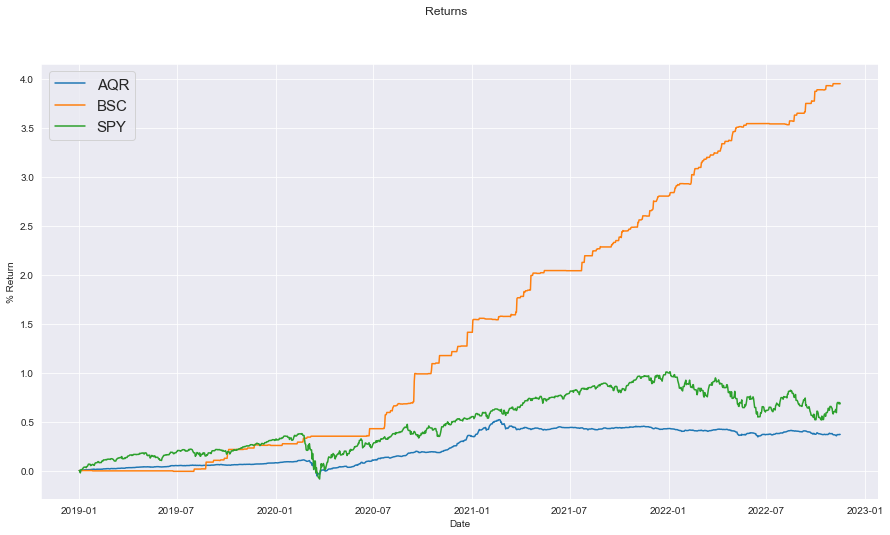

In [205]:
fig, ax = plt.subplots(figsize=(15,8))
fig.suptitle('Returns')
plt.plot(cumu_profit)
plt.xlabel('Date')
plt.ylabel('% Return')
ax.legend(cumu_profit.columns,loc=2, prop={'size':15})
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\return_comp.jpg",dpi=300)

In [176]:
def sort_returns(x):
    if x<0:
        return "Negative"
    elif x == 0:
        return "0.00%"
    elif x>0 and x<=.01:
        return '0.00%-0.01%'
    elif x>.01 and x<=.02:
        return "0.01%-0.02%"
    elif x>.02 and x<=.03:
        return "0.02%-0.03%"
    elif x>0.03 and x<=.04:
        return "0.03%-0.04%"
    elif x>.04 and x<=.05:
        return "0.04%-0.05%"
    elif x>.05 and x<=.06:
        return "0.05%-0.06%"
    elif x>.06 and x<=.07:
        return "0.06%-0.07%"
    elif x>.07 and x<=.08:
        return "0.07%-0.08%"
    else: return "Greater than 0.08%"

backtest['vals'] = backtest['BSC'].apply(lambda x: sort_returns(x))

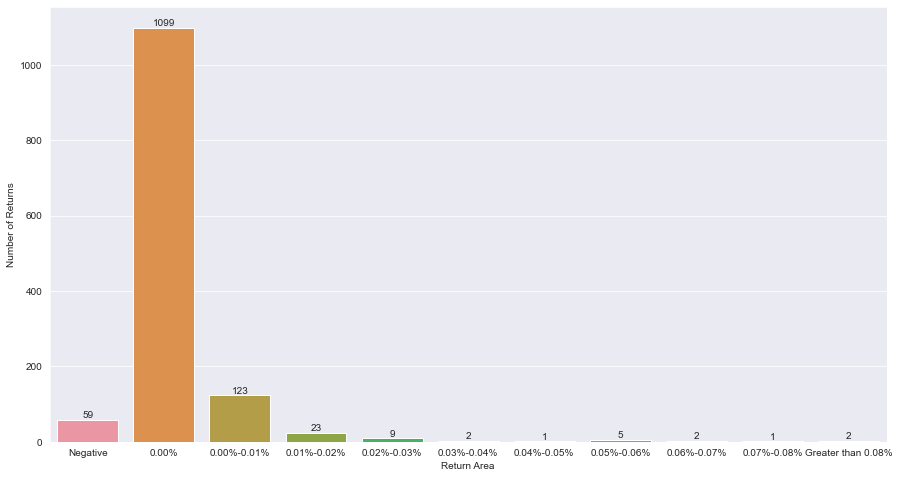

In [208]:
pd.options.display.max_rows=15
vc_r = backtest['vals'].value_counts()
vc_r = vc_r.reset_index().sort_values('index')
idx = [2,0,1,3,4,8,10,5,7,9,6]
vc_r = vc_r.reindex(idx)
fig, ax = plt.subplots(figsize=(15,8))
#sns.barplot(x = vc_r['index'],y = vc_r['vals'])
ax = sns.barplot(x = 'index', y = 'vals', 
              data = vc_r,)
ax.set(xlabel='Return Area', ylabel='Number of Returns')
for i in ax.containers:
    ax.bar_label(i,)
plt.savefig("C:\\Users\\awkno\\FINM 35910\\Sports Arbitrage\\returndist.jpg",dpi=300)

In [175]:
vc_r

,index,vals
0,1,1099
1,2,123
2,0,59
3,3,23
4,4,9
...,...,...
6,10,2
7,8,2
8,5,2
9,9,1


#### CAGR

In [136]:
aqr = aqr.fillna(0)
aqr['AQR Profit'] = (aqr['AQR'] +1).cumprod()*100000
spy = spy.fillna(0)
spy['SPY Profit'] = (spy['SPY'] +1).cumprod()*100000
rf = rf.fillna(0)
rf['RF Profit'] = (rf['RF'] + 1).cumprod()*100000

C:\Users\awkno\Anaconda3\envs\Projects\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


In [137]:
aqrcg = (aqr['AQR Profit'].iloc[-1]/aqr['AQR Profit'].iloc[1])**(1/((aqr.index[-1]-aqr.index[0]).days/365.24))-1
aqrcg*100

8.441085747536192

In [138]:
bcscg = (backtest['profit'].iloc[-1]/backtest['profit'].iloc[1])**(1/((backtest.index[-1]-backtest.index[0]).days/365.24))-1
bcscg*100

51.11856563385191

In [139]:
spycg = (spy['SPY Profit'].iloc[-1]/spy['SPY Profit'].iloc[1])**(1/((spy.index[-1]-spy.index[0]).days/365.24))-1
spycg*100

15.08714053338991

#### Correlation to SPY

<AxesSubplot:>

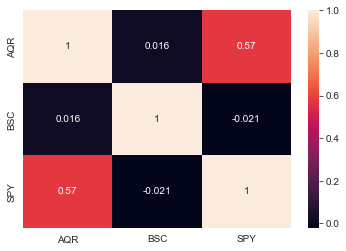

In [140]:
sns.heatmap(comps.corr(),annot=True)

#### Treynor Ratio

In [141]:
comps['BSC_excess'] = (comps['BSC'] - rf['RF Values']).fillna(0)
comps['AQR_excess'] = (comps['AQR'] - rf['RF Values']).fillna(0)
comps['SPY_excess'] = (comps['SPY'] - rf['RF Values']).fillna(0)

In [142]:
comps

,AQR,BSC,SPY,BSC_excess,AQR_excess,SPY_excess
Date,,,,,,
2019-01-01,0.000000,0.0,0.000000,0.0000,0.000000,0.000000
2019-01-02,0.000000,0.0,0.000000,-0.0266,-0.026600,-0.026600
2019-01-03,0.000000,0.0,-0.023863,-0.0256,-0.025600,-0.049463
2019-01-04,0.001138,0.0,0.033496,-0.0267,-0.025562,0.006796
2019-01-05,0.000000,0.0,0.000000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...
2022-11-12,0.000000,0.0,0.000000,0.0000,0.000000,0.000000
2022-11-13,0.000000,0.0,0.000000,0.0000,0.000000,0.000000
2022-11-14,-0.000862,0.0,-0.008507,-0.0388,-0.039662,-0.047307


In [143]:
market_var = sum(((comps['SPY_excess']-comps.mean().values[5])**2)/len(comps))

In [144]:
rfr = rf['RF Values'].mean()

In [145]:
cov_bs = sum(((comps['BSC_excess']-comps.mean().values[3])*(comps['SPY_excess']-comps.mean().values[5]))/(len(comps)-1))
cov_as = sum(((comps['AQR_excess']-comps.mean().values[4])*(comps['SPY_excess']-comps.mean().values[5]))/(len(comps)-1))

In [146]:
beta_bsc = cov_bs/market_var
beta_aqr = cov_as/market_var

In [147]:
(bcscg - rfr)/beta_bsc

1.1035781826252424

In [148]:
(aqrcg - rfr)/beta_aqr

0.1228299898071633

#### Jensens Alpha

In [149]:
bsc_ja = bcscg - [rfr + beta_bsc*(spycg-rfr)][0]

In [150]:
bsc_ja

0.43411797301671795

In [151]:
aqr_ja = aqrcg - [rfr + beta_aqr*(spycg-rfr)][0]

In [152]:
aqr_ja

-0.005883043140894495